# Market Basket Analysis

# Libraries

<h3>Importing Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
from apyori import apriori



# Import Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import re
import networkx as nx

 ## Data Loading 

In [3]:
# read the dataset
import pandas as pd
data = pd.read_excel("project_data_set.xlsx") 

In [4]:
data.describe

<bound method NDFrame.describe of         BillNo                             Itemname  Quantity  \
0       536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365                  WHITE METAL LANTERN         6   
2       536365       CREAM CUPID HEARTS COAT HANGER         8   
3       536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...                                  ...       ...   
522059  581587          PACK OF 20 SPACEBOY NAPKINS        12   
522060  581587          CHILDREN'S APRON DOLLY GIRL         6   
522061  581587         CHILDRENS CUTLERY DOLLY GIRL         4   
522062  581587      CHILDRENS CUTLERY CIRCUS PARADE         4   
522063  581587         BAKING SET 9 PIECE RETROSPOT         3   

                      Date  Price  CustomerID         Country  
0      2010-12-01 08:26:00   2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00   3.39     17850.0  United Kin

In [5]:
data.columns

Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')

In [6]:
# Bottom 5 rows in dataset
data.tail()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
522063,581587,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
# Top 5 rows in dataset
data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
data["BillNo"].unique()

array([536365, 536366, 536367, ..., 581585, 581586, 581587], dtype=object)

In [9]:
# how does the data looks
print(data.shape)# total rows * column count
print("/n")
print(data.dtypes)# each column datatype

(522064, 7)
/n
BillNo                object
Itemname              object
Quantity               int64
Date          datetime64[ns]
Price                float64
CustomerID           float64
Country               object
dtype: object


In [10]:
# Summary statistics
summary_stats = data.describe()

# Number of rows and columns
num_rows, num_cols = data.shape

# Data types of columns
data_types = data.dtypes

In [11]:
#finding duplicate values in a dataset
data.duplicated().sum()

5286

In [12]:
data = data.drop_duplicates()

In [13]:
#finding duplicate values in a dataset
data.duplicated().sum()

0

In [14]:
#correlation with heatmap to interpret the relation and multicolliniarity
data.select_dtypes(include = "number").corr()

,Quantity,Price,CustomerID
Quantity,1.000000,-0.002815,-0.005791
Price,-0.002815,1.000000,-0.010178
CustomerID,-0.005791,-0.010178,1.000000


In [15]:
#choose the method of imputing missing value
#like mean,median,mode or KNNIputer
data.isnull().sum()#there is no null values in this dataset

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    133967
Country            0
dtype: int64

In [1]:
# Check for missing values
missing_values = data.isnull().sum()

NameError: name 'data' is not defined

In [ ]:
#choose the method of imputing missing value
#like mean,median,mode or KNNIputer
data.isnull().sum()#there is no null values in this dataset

In [17]:
# Unique values in categorical columns
unique_values_product = data['BillNo'].unique()
unique_values_category = data['Itemname'].unique()
unique_values_subcategory = data['Quantity'].unique()
unique_values_brand = data['Date'].unique()
unique_values_type = data['Price'].unique()
unique_values_type = data['CustomerID'].unique()
unique_values_type = data['Country'].unique()

## EXPLORATORY DATA ANALYSIS
Exploring the data

In [18]:
data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
data.shape

(516778, 7)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516778 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      516778 non-null  object        
 1   Itemname    515323 non-null  object        
 2   Quantity    516778 non-null  int64         
 3   Date        516778 non-null  datetime64[ns]
 4   Price       516778 non-null  float64       
 5   CustomerID  382811 non-null  float64       
 6   Country     516778 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 31.5+ MB


In [21]:
data.describe()

,Quantity,Date,Price,CustomerID
count,516778.00000,516778,516778.000000,382811.000000
mean,10.16247,2011-07-04 08:18:39.177790464,3.841504,15310.347702
min,-9600.00000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.00000,2011-03-28 09:59:00,1.250000,13928.500000
50%,3.00000,2011-07-19 14:29:00,2.080000,15249.000000
75%,10.00000,2011-10-19 12:11:00,4.130000,16820.000000
max,80995.00000,2011-12-09 12:50:00,13541.330000,18287.000000
std,161.91653,NaN,42.113493,1722.483516


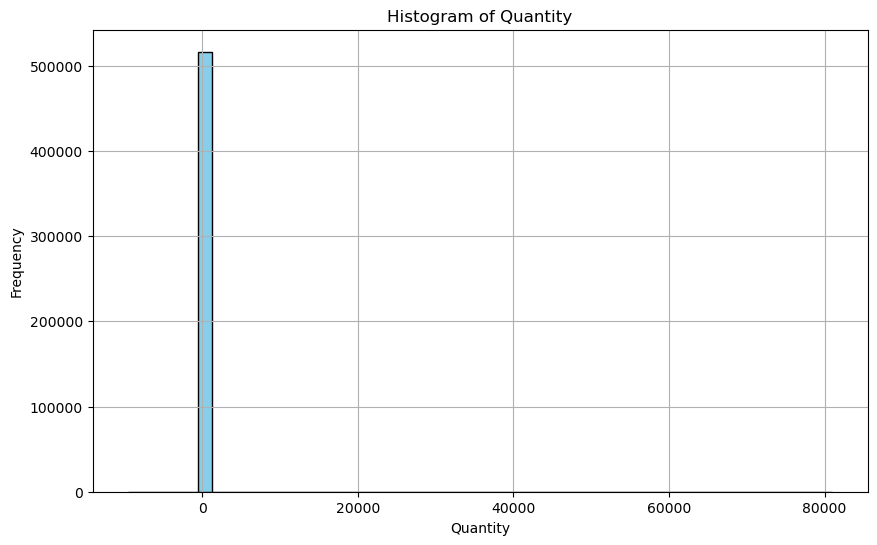

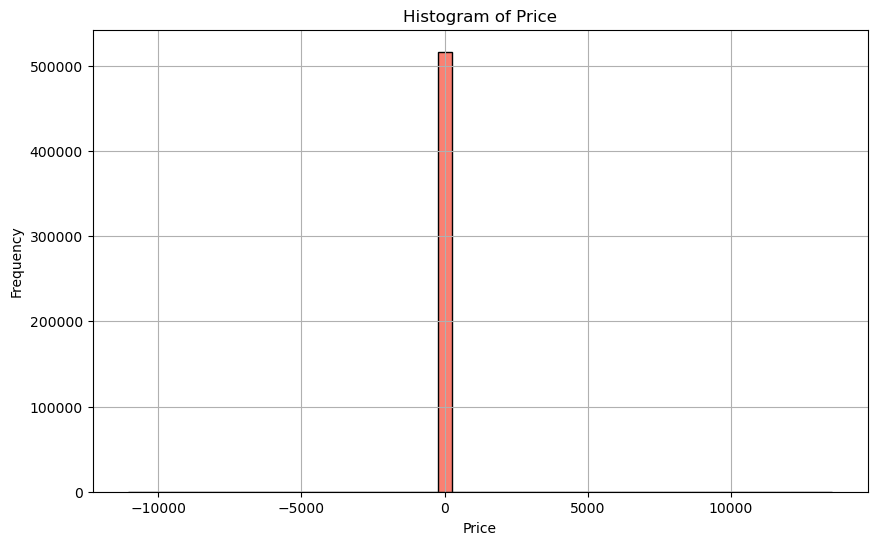

In [22]:
import matplotlib.pyplot as plt

# Histogram for Quantity
plt.figure(figsize=(10, 6))
plt.hist(data['Quantity'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram for Price
plt.figure(figsize=(10, 6))
plt.hist(data['Price'], bins=50, color='salmon', edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Axes: >

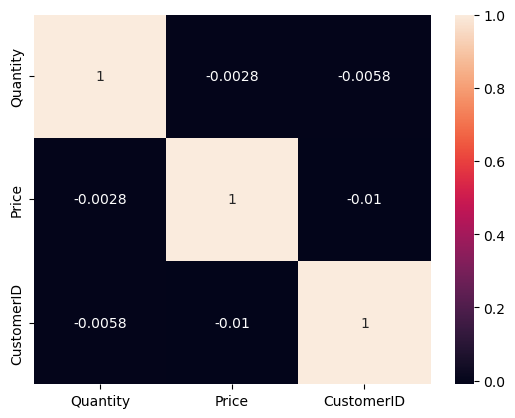

In [23]:
import seaborn as sns
sns.heatmap(data.select_dtypes(include = "number").corr(),annot = True)

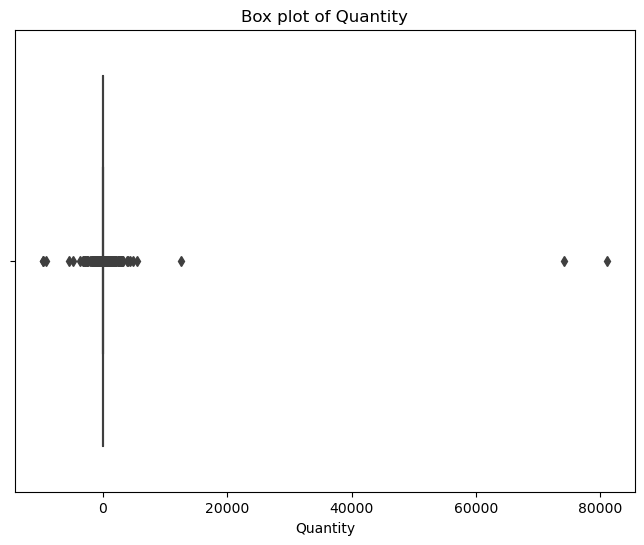

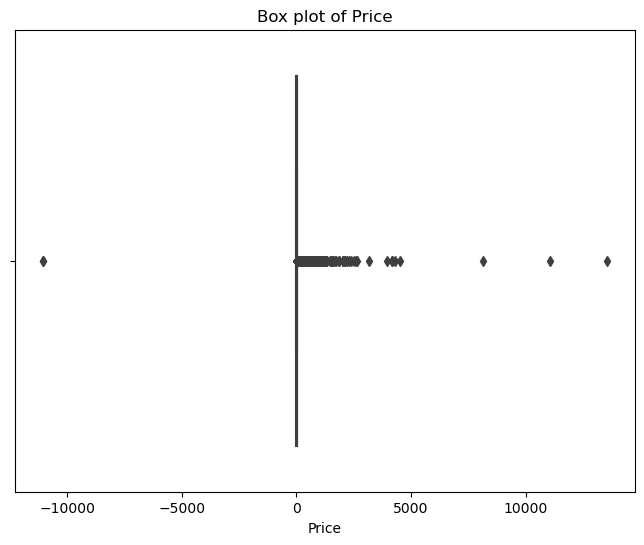

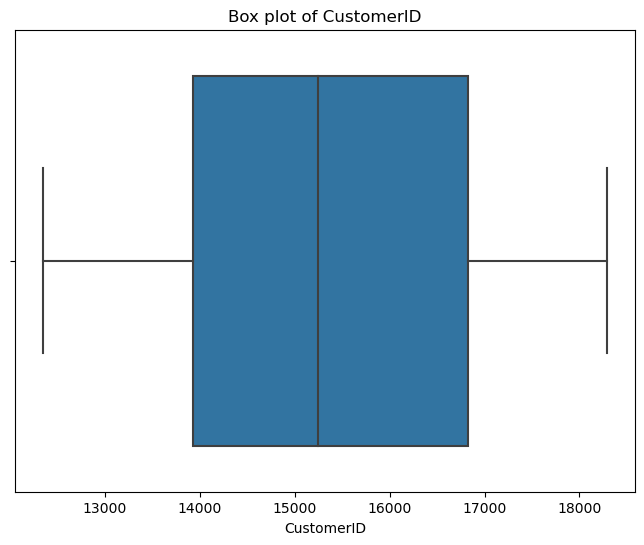

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


for column in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=column)
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.show()

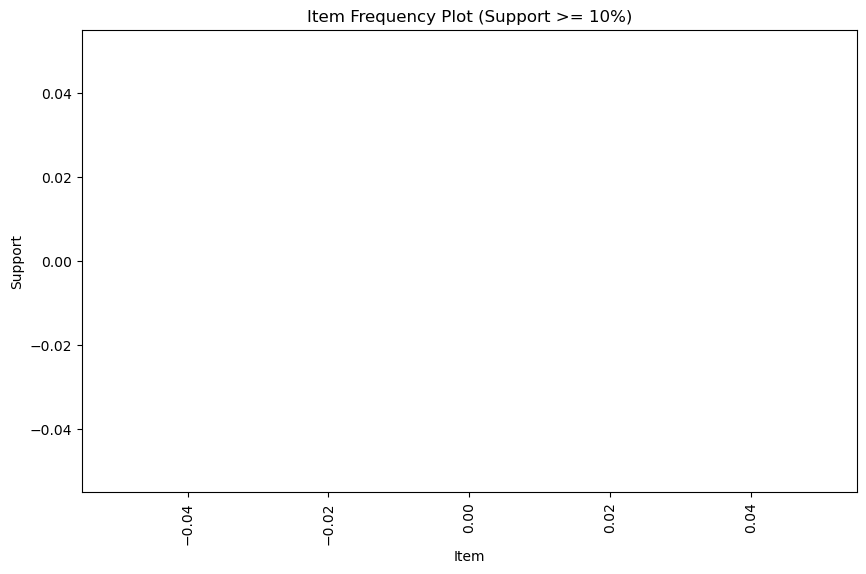

In [25]:
from mlxtend.frequent_patterns import apriori
import pandas as pd
import matplotlib.pyplot as plt


# Calculating item frequency
item_counts = data['Itemname'].value_counts(normalize=True)

# Filtering items with a support of 10% or higher
frequent_items = item_counts[item_counts >= 0.10].reset_index()

# Renaming columns properly
frequent_items.columns = ['Item', 'Support']

# Plotting the item frequency
plt.figure(figsize=(10, 6))
plt.bar(frequent_items['Item'], frequent_items['Support'])  # Use 'Item' column
plt.xlabel('Item')
plt.ylabel('Support')
plt.title('Item Frequency Plot (Support >= 10%)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

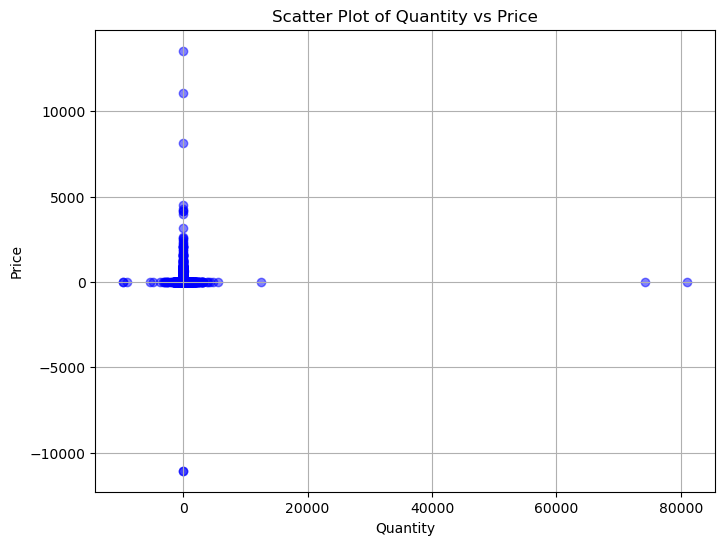

In [26]:
import matplotlib.pyplot as plt

# Scatter plot between Quantity and Price
plt.figure(figsize=(8, 6))
plt.scatter(data['Quantity'], data['Price'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Quantity vs Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [46]:
# describe function used to find the total count,mean,standard deviation,maximum value,minimum value
# 25,50,75 percentage of the dataset value
data.describe()

,Quantity,Date,Price,CustomerID,Year,Month,Day
count,515323.000000,515323,515323.000000,382811.000000,515323.000000,515323.000000,515323.000000
mean,10.218348,2011-07-04 11:11:17.317022720,3.852350,15310.347702,2010.921191,7.554559,15.029731
min,-9600.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,2010.000000,1.000000,1.000000
25%,1.000000,2011-03-28 10:14:00,1.250000,13928.500000,2011.000000,5.000000,7.000000
50%,3.000000,2011-07-19 15:55:00,2.080000,15249.000000,2011.000000,8.000000,15.000000
75%,10.000000,2011-10-19 12:35:00,4.130000,16820.000000,2011.000000,11.000000,22.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,2011.000000,12.000000,31.000000
std,161.625366,NaN,42.172409,1722.483516,0.269440,3.514280,8.672723


In [94]:
# Assuming 'data' is your dataset DataFrame

# Grouping by 'Year' and 'Month' and calculating the sum of 'Price' and 'Quantity'
sales = data.groupby(['Year', 'Month']).agg({'Price':'sum', 'Quantity':'sum'})

# Pivot the DataFrame
import numpy as np
sales = sales.pivot_table(index=['Year', 'Month'], aggfunc=np.sum, fill_value=0)

# Plotting the data
sales.plot(kind='bar', cmap='Set1')
plt.show()

KeyError: 'Year'

In [68]:
# Grouping by 'Year', 'Month', and 'Country' and calculating the sum of 'Price'
sales_country = data.groupby(['Year', 'Month', 'Country'])['Price'].sum().reset_index()

# Plotting
import plotly.express as px
fig = px.bar(sales_country, x='Month', y='Price', color='Country',
             title='Monthly sales amount in each country in 2021')
fig.update_layout(xaxis_title='Month', yaxis_title='Sales amount')
fig.show()

import warnings
# Suppress DeprecationWarning related to distutils
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [70]:
import plotly.express as px

# Grouping by 'Country' and summing 'Price'
country_sales = data.groupby('Country')['Price'].sum().reset_index()

# Plotting the data
fig = px.bar(country_sales, x='Country', y='Price', title='Sales amount in each country in 2021')
fig.update_layout(xaxis={'categoryorder': 'total descending'}, yaxis_title='Sales amount')
fig.show()

In [78]:
import matplotlib.pyplot as plt
from matplotlib import cm
# Assuming 'data' is  DataFrame
data[['Itemname', 'Quantity']].sort_values(by='Quantity', ascending=False)[:10].style.background_gradient(cmap='viridis', subset=['Quantity']).format("{:.0f}", subset=['Quantity'])

,Itemname,Quantity
520583,"PAPER CRAFT , LITTLE BIRDIE",80995
59999,MEDIUM CERAMIC TOP STORAGE JAR,74215
483371,ASSTD DESIGN 3D PAPER STICKERS,12540
405138,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800
198929,SMALL POPCORN HOLDER,4300
213130,?,4000
94245,EMPIRE DESIGN ROSETTE,3906
260928,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186
154834,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114
51228,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114


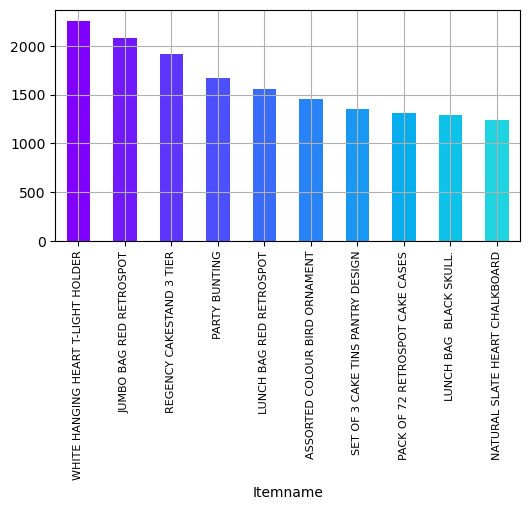

In [79]:
import matplotlib.pyplot as plt
from matplotlib import cm
color=plt.cm.rainbow(np.linspace(0,1,30))
data['Itemname'].value_counts().head(10).plot.bar(color=color,figsize=(6,3))

# plt.title('Frequency of Most popular items',fontsize=14)
plt.xticks(rotation=90,fontsize=8)
plt.grid()
plt.show()

## Data Preprocessing

In [80]:
data.columns

Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country', 'column', 'Year', 'Month', 'Day', 'quantity'],
      dtype='object')

# Handling null values

In [81]:
data.isnull().sum()

BillNo             0
Itemname           0
Quantity           0
Date               0
Price              0
CustomerID    132512
Country            0
column             0
Year               0
Month              0
Day                0
quantity      388495
dtype: int64

 Remove the null values from the data with respect to the Itemname

In [82]:
#Display the first few rows of the dataset
print(data.head())

   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   Price  CustomerID         Country     column  Year  Month  Day  quantity  
0   2.55     17850.0  United Kingdom  new_value  2010     12    1       NaN  
1   3.39     17850.0  United Kingdom  new_value  2010     12    1       NaN  
2   2.75     17850.0  United Kingdom  new_value  2010     12    1       NaN  
3   3.39     17850.0  United Kingdom  new_value  2010     12    1       NaN  
4   3.39     17850.0  United Kingdom  new_value  2010     12    1       NaN  


In [83]:
# Check the dimensions of the dataset (number of rows and columns)
print(data.shape)

(515323, 12)


In [84]:
# Check the data types of each column
print(data.dtypes)

BillNo                object
Itemname              object
Quantity               int64
Date          datetime64[ns]
Price                float64
CustomerID           float64
Country               object
column                object
Year                   int32
Month                  int32
Day                    int32
quantity             float64
dtype: object


In [85]:
print(data.isnull().sum())

BillNo             0
Itemname           0
Quantity           0
Date               0
Price              0
CustomerID    132512
Country            0
column             0
Year               0
Month              0
Day                0
quantity      388495
dtype: int64


In [86]:
x = data.iloc[:, :-2].values
y = data.iloc[:, 4].values

<b><p style='font-size:19px'>Handling Duplicates</p></b>

In [87]:
data.duplicated().sum()

0

In [88]:
data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,column,Year,Month,Day,quantity
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,new_value,2010,12,1,NaN
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,new_value,2010,12,1,NaN
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,new_value,2010,12,1,NaN
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,new_value,2010,12,1,NaN
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,new_value,2010,12,1,NaN


In [89]:
#  Identify missing values
missing_values_CustomerID = data['CustomerID'].isnull().sum()

In [90]:
# Assess the extent of missingness
percentage_missing_CustomerID = (missing_values_CustomerID / len(data)) * 100

In [91]:
# Decide on handling strategy
cleaned_data = data.dropna(subset=['CustomerID'])

<b style='font-size:18px'>Let's extract Itemnames for each BillNo. and store it in a list.</b>

In [92]:
items=data.set_index(['BillNo']).stack()

In [93]:
item=pd.DataFrame(items)

In [94]:
item.rename(columns={0:'list'},inplace=True)

In [95]:
item.index.levels[0]

Index([   536365,    536366,    536367,    536368,    536369,    536370,
          536371,    536372,    536373,    536374,
       ...
          581581,    581582,    581583,    581584,    581585,    581586,
          581587, 'A563185', 'A563186', 'A563187'],
      dtype='object', name='BillNo', length=20208)

In [96]:
products=[]

for i in (item.index.levels[0]):
    product=item.loc[(i,['Itemname']),'list'].to_list()
    
    products.append(product)

In [97]:
products[0:5]

[['WHITE HANGING HEART T-LIGHT HOLDER',
  'WHITE METAL LANTERN',
  'CREAM CUPID HEARTS COAT HANGER',
  'KNITTED UNION FLAG HOT WATER BOTTLE',
  'RED WOOLLY HOTTIE WHITE HEART.',
  'SET 7 BABUSHKA NESTING BOXES',
  'GLASS STAR FROSTED T-LIGHT HOLDER'],
 ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'],
 ['ASSORTED COLOUR BIRD ORNAMENT',
  "POPPY'S PLAYHOUSE BEDROOM",
  "POPPY'S PLAYHOUSE KITCHEN",
  'FELTCRAFT PRINCESS CHARLOTTE DOLL',
  'IVORY KNITTED MUG COSY',
  'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  'BOX OF VINTAGE JIGSAW BLOCKS',
  'BOX OF VINTAGE ALPHABET BLOCKS',
  'HOME BUILDING BLOCK WORD',
  'LOVE BUILDING BLOCK WORD',
  'RECIPE BOX WITH METAL HEART',
  'DOORMAT NEW ENGLAND'],
 ['JAM MAKING SET WITH JARS',
  'RED COAT RACK PARIS FASHION',
  'YELLOW COAT RACK PARIS FASHION',
  'BLUE COAT RACK PARIS FASHION'],
 ['BATH BUILDING BLOCK WORD']]

## Model selection  And Training Model
Buliding rules to the Apriori model

In [1]:
!pip install apyori

In [2]:
#import all required packages
import pandas as pd
import numpy as np
from apyori import apriori

In [3]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [7]:
import pandas as pd
data = pd.read_excel("project_data_set.xlsx") 

In [65]:
data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
data.columns

Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')

In [66]:
data.dropna(axis = 0, subset = ['BillNo'],inplace = True)#remove duplicate invoice
data['BillNo'] = data['BillNo'].astype('str') # converting BillNo to be string
data = data[~data['BillNo'].str.contains('C')]# remove the credit tarnscations
data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [51]:
data['Country'].value_counts()

Country
United Kingdom          487622
Germany                   9042
France                    8408
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Sweden                     451
Unspecified                446
Austria                    398
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Greece                     145
Malta                      112
United Arab Emirates        68
RSA                         58
Lebanon                     45
Lithuania                   35
Brazil                      32
Bahrain                     18
Saudi Arabia                 9
Name: count, dtype: int64

In [35]:
basket=(data[data['Country']=='United Kingdom']
        .groupby(['BillNo','Itemname'])['Quantity']
        .sum().unstack().reset_index().fillna(0)
        .set_index('BillNo'))

In [12]:
# Viewing basket
mybasket.head()

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
CustomerID,,,,,,,,,,,,,,,,,,,,,
12426.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12427.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12468.0,0,555523,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12471.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12472.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Define the function to encode units
def my_encode_units(x):
    # Check if x is numeric
    if isinstance(x, (int, float)):
        # Encode units based on the value of x
        if x <= 0:
            return 0
        if x >= 1:
            return 1
    # Return 0 for non-numeric values
    return 0

# Apply the my_encode_units function using applymap
mybasket_sets = mybasket.applymap(my_encode_units)

In [72]:
data['Itemname']=data['Itemname'].str.strip()
data['BillNo']=data['BillNo'].astype('str')

In [69]:
# Verify column names in Data
print(mybasket_sets.columns)

# Drop the 'POSTAGE' column if it exists
if 'POSTAGE' in mybasket_sets.columns:
    mybasket_sets.drop('POSTAGE', inplace=True, axis=1)
else:
    print("Column 'POSTAGE' does not exist in the Data.")

Index(['10 COLOUR SPACEBOY PEN', '12 COLOURED PARTY BALLOONS',
       '12 IVORY ROSE PEG PLACE SETTINGS', '12 MESSAGE CARDS WITH ENVELOPES',
       '12 PENCIL SMALL TUBE WOODLAND', '12 PENCILS SMALL TUBE RED RETROSPOT',
       '12 PENCILS SMALL TUBE SKULL', '12 PENCILS TALL TUBE POSY',
       '12 PENCILS TALL TUBE RED RETROSPOT', '12 PENCILS TALL TUBE SKULLS',
       ...
       'YULETIDE IMAGES GIFT WRAP SET', 'ZINC  HEART T-LIGHT HOLDER',
       'ZINC  STAR T-LIGHT HOLDER', 'ZINC BOX SIGN HOME',
       'ZINC FOLKART SLEIGH BELLS', 'ZINC HEART LATTICE T-LIGHT HOLDER',
       'ZINC METAL HEART DECORATION', 'ZINC T-LIGHT HOLDER STAR LARGE',
       'ZINC T-LIGHT HOLDER STARS SMALL', 'ZINC WILLIE WINKIE  CANDLE STICK'],
      dtype='object', name='Itemname', length=1695)


In [91]:
# Generate frequent itemsets with a lower minimum support threshold
my_frequent_itemsets = apriori(mybasket_sets, min_support=0.0000000001, use_colnames=True)

In [92]:
my_frequent_itemsets.shape

(0, 2)

In [93]:
# generating rules
my_rules = association_rules(my_frequent_itemsets,metric = "lift", min_threshold = 1)

ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

In [ ]:
results=list(rules)

In [11]:
# Seprating BillNo from Germany
mybasket = (data[data['Country']=="Germany"]
           .groupby(['CustomerID','Itemname'])['BillNo']
           .sum().unstack().reset_index().fillna(0)
           .set_index('CustomerID'))

In [82]:
# Using the print() function
print(mybasket_sets)

# Directly outputting the dataset variable in a Jupyter Notebook cell
mybasket_sets

Itemname    10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
CustomerID                                                       
12426.0                          0                           0   
12427.0                          0                           0   
12468.0                          0                           0   
12471.0                          0                           0   
12472.0                          0                           0   
...                            ...                         ...   
13814.0                          0                           0   
13815.0                          0                           0   
13816.0                          0                           0   
13817.0                          0                           0   
14335.0                          0                           0   

Itemname    12 IVORY ROSE PEG PLACE SETTINGS  12 MESSAGE CARDS WITH ENVELOPES  \
CustomerID                                                  

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
CustomerID,,,,,,,,,,,,,,,,,,,,,
12426.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12427.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12468.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12471.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12472.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13814.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13815.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13816.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Convert index object to a list to get column names
column_names = list(mybasket.columns)

# Print the column names
print(column_names)

# Model Evaluation  or Validation

In [70]:
! pip install mlxtend

In [71]:
# read the dataset
import pandas as pd
data = pd.read_excel("project_data_set.xlsx") 

In [ ]:
# Assuming your dataset is named 'data'
description = data.describe()

# Print the description
print(description)

In [77]:
from mlxtend.frequent_patterns import association_rules

# Generate frequent itemsets
my_frequent_itemsets = mybasket_sets()

# Convert generator object to a list of dictionaries
frequent_itemsets_list = list(my_frequent_itemsets)

# Convert list of dictionaries to Data
import pandas as pd
my_frequent_itemsets_df = pd.Data(frequent_itemsets_list)

# Generating rules
my_rules = association_rules(my_frequent_itemsets_df, metric="lift", min_threshold=1)


TypeError: 'DataFrame' object is not callable

In [ ]:
 #Generating frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support = 0.07, use_colnames = True)

In [ ]:
from mlxtend.frequent_patterns import apriori

# Generate frequent itemsets using the Apriori algorithm
# Assuming my_basket_sets is your transaction data represented as a Data
# Make sure to replace 'your_parameters' with appropriate parameters for Apriori
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.05, use_colnames=True)

# Print the frequent itemsets
print(my_frequent_itemsets)

In [ ]:
def inspect(results):
    lhs=[tuple(result[2][0][0])[0] for result in results]
    rhs=[tuple(result[2][0][1])[0] for result in results]
    supports=[result[1] for result in results]
    confidences=[result[2][0][2] for result in results]
    lifts=[result[2][0][3] for result in results]

    return list(zip(lhs,rhs,supports,confidences,lifts))

In [ ]:
result=pd.DataFrame(inspect(results),columns=['Left Hand Side','Right Hand Side','Support','Confidence','Lift'])

In [ ]:
result.sort_values(by='Confidence',ascending=False)

<b style='font-size:18px'>The above data frame says that if a person bought a product in Left Hand Side, with some confidence he bought product from Right Hand Side.</b>